In [1]:
### header ###
__author__ = "Jenhan Tao"
__license__ = "BSD"
__email__ = "jenhantao@gmail.com"
%load_ext autoreload
%autoreload 2
### imports ###
import sys
%matplotlib inline
sys.path.append("/home/jenhan/code/seq_merge_pipe/")
import os
import pandas as pd
import numpy as np
import argparse
import matplotlib
import itertools
import scipy
import matplotlib.pyplot as plt 
import seaborn as sns
from IPython.display import Image, display
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
import scipy
matplotlib.pylab.rcParams['savefig.dpi'] = 200
sys.setrecursionlimit(3000)
os.chdir('/home/jenhan/analysis/ncor_analysis/')
import pickle
sns.set_context('talk')

/bioinformatics/software/anaconda3/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
peakDirectory = '/home/jenhan/analysis/ncor_analysis/peak_files_methylationAnalysis/'
outputDirectory = '/home/jenhan/analysis/ncor_analysis/methylation/'
tagDir_directory = '/home/jenhan/analysis/ncor_analysis/tag_directories_chip/'

In [6]:
!if [ ! -d /home/jenhan/analysis/ncor_analysis/methylation ]; then mkdir /home/jenhan/analysis/ncor_analysis/methylation; fi

## Merge Peak files Together 

In [34]:
factors = set([x.split('_')[0] for x in os.listdir(peakDirectory)])
for factor in factors:
    !mergePeaks -d given $peakDirectory/$factor* > "$outputDirectory/$factor"_merged.tsv



	Max distance to merge: direct overlap required (-d given)
	Merging peaks... 
	Comparing /home/jenhan/analysis/ncor_analysis/peak_files_methylationAnalysis//cjun_kla_peaks.tsv (3515 total) and /home/jenhan/analysis/ncor_analysis/peak_files_methylationAnalysis//cjun_kla_peaks.tsv (3515 total)
	Comparing /home/jenhan/analysis/ncor_analysis/peak_files_methylationAnalysis//cjun_kla_peaks.tsv (3515 total) and /home/jenhan/analysis/ncor_analysis/peak_files_methylationAnalysis//cjun_notx_peaks.tsv (2542 total)
	Comparing /home/jenhan/analysis/ncor_analysis/peak_files_methylationAnalysis//cjun_notx_peaks.tsv (2542 total) and /home/jenhan/analysis/ncor_analysis/peak_files_methylationAnalysis//cjun_kla_peaks.tsv (3515 total)
	Comparing /home/jenhan/analysis/ncor_analysis/peak_files_methylationAnalysis//cjun_notx_peaks.tsv (2542 total) and /home/jenhan/analysis/ncor_analysis/peak_files_methylationAnalysis//cjun_notx_peaks.tsv (2542 total)

/home/jenhan/analysis/ncor_analysis/peak_files_methylatio

## Annotate Peak Files

In [79]:
for p in os.listdir(peakDirectory):
    if '_peaks.tsv' in p:
        outname=p.replace('peaks', 'ncorAnnotated')
        !annotatePeaks.pl $peakDirectory/$p mm10 -size 200 -d $tagDir_directory/Sample_Coro2AWT_BMDM_ChIP_NCoR_KLA_1h_JSS_15_02_02 $tagDir_directory/Sample_NCoRWT_BMDM_NCoR_KLA_1h_JSS_14_11_04 $tagDir_directory/Sample_Coro2AWT_BMDM_ChIP_NCoR_NoTx_JSS_15_02_02 $tagDir_directory/Sample_NCoRWT_BMDM_NCoR_NoTx_JSS_14_11_04 > $outputDirectory/$outname


	Peak file = /home/jenhan/analysis/ncor_analysis/peak_files_methylationAnalysis//p65_notx_peaks.tsv
	Genome = mm10
	Organism = mouse
	Peak Region set to 200
	Tag Directories:
		/home/jenhan/analysis/ncor_analysis/tag_directories_chip//Sample_Coro2AWT_BMDM_ChIP_NCoR_KLA_1h_JSS_15_02_02
		/home/jenhan/analysis/ncor_analysis/tag_directories_chip//Sample_NCoRWT_BMDM_NCoR_KLA_1h_JSS_14_11_04
		/home/jenhan/analysis/ncor_analysis/tag_directories_chip//Sample_Coro2AWT_BMDM_ChIP_NCoR_NoTx_JSS_15_02_02
		/home/jenhan/analysis/ncor_analysis/tag_directories_chip//Sample_NCoRWT_BMDM_NCoR_NoTx_JSS_14_11_04
	Peak/BED file conversion summary:
		BED/Header formatted lines: 0
		peakfile formatted lines: 9
		Duplicated Peak IDs: 0

	Peak File Statistics:
		Total Peaks: 9
		Redundant Peak IDs: 0
		Peaks lacking information: 0 (need at least 5 columns per peak)
		Peaks with misformatted coordinates: 0 (should be integer)
		Peaks with misformatted strand: 0 (should be either +/- or 0/1)

	Peak file looks 

/bioinformatics/software/anaconda3/lib/python3.4/site-packages/seaborn/categorical.py:1613: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)
/bioinformatics/software/anaconda3/lib/python3.4/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


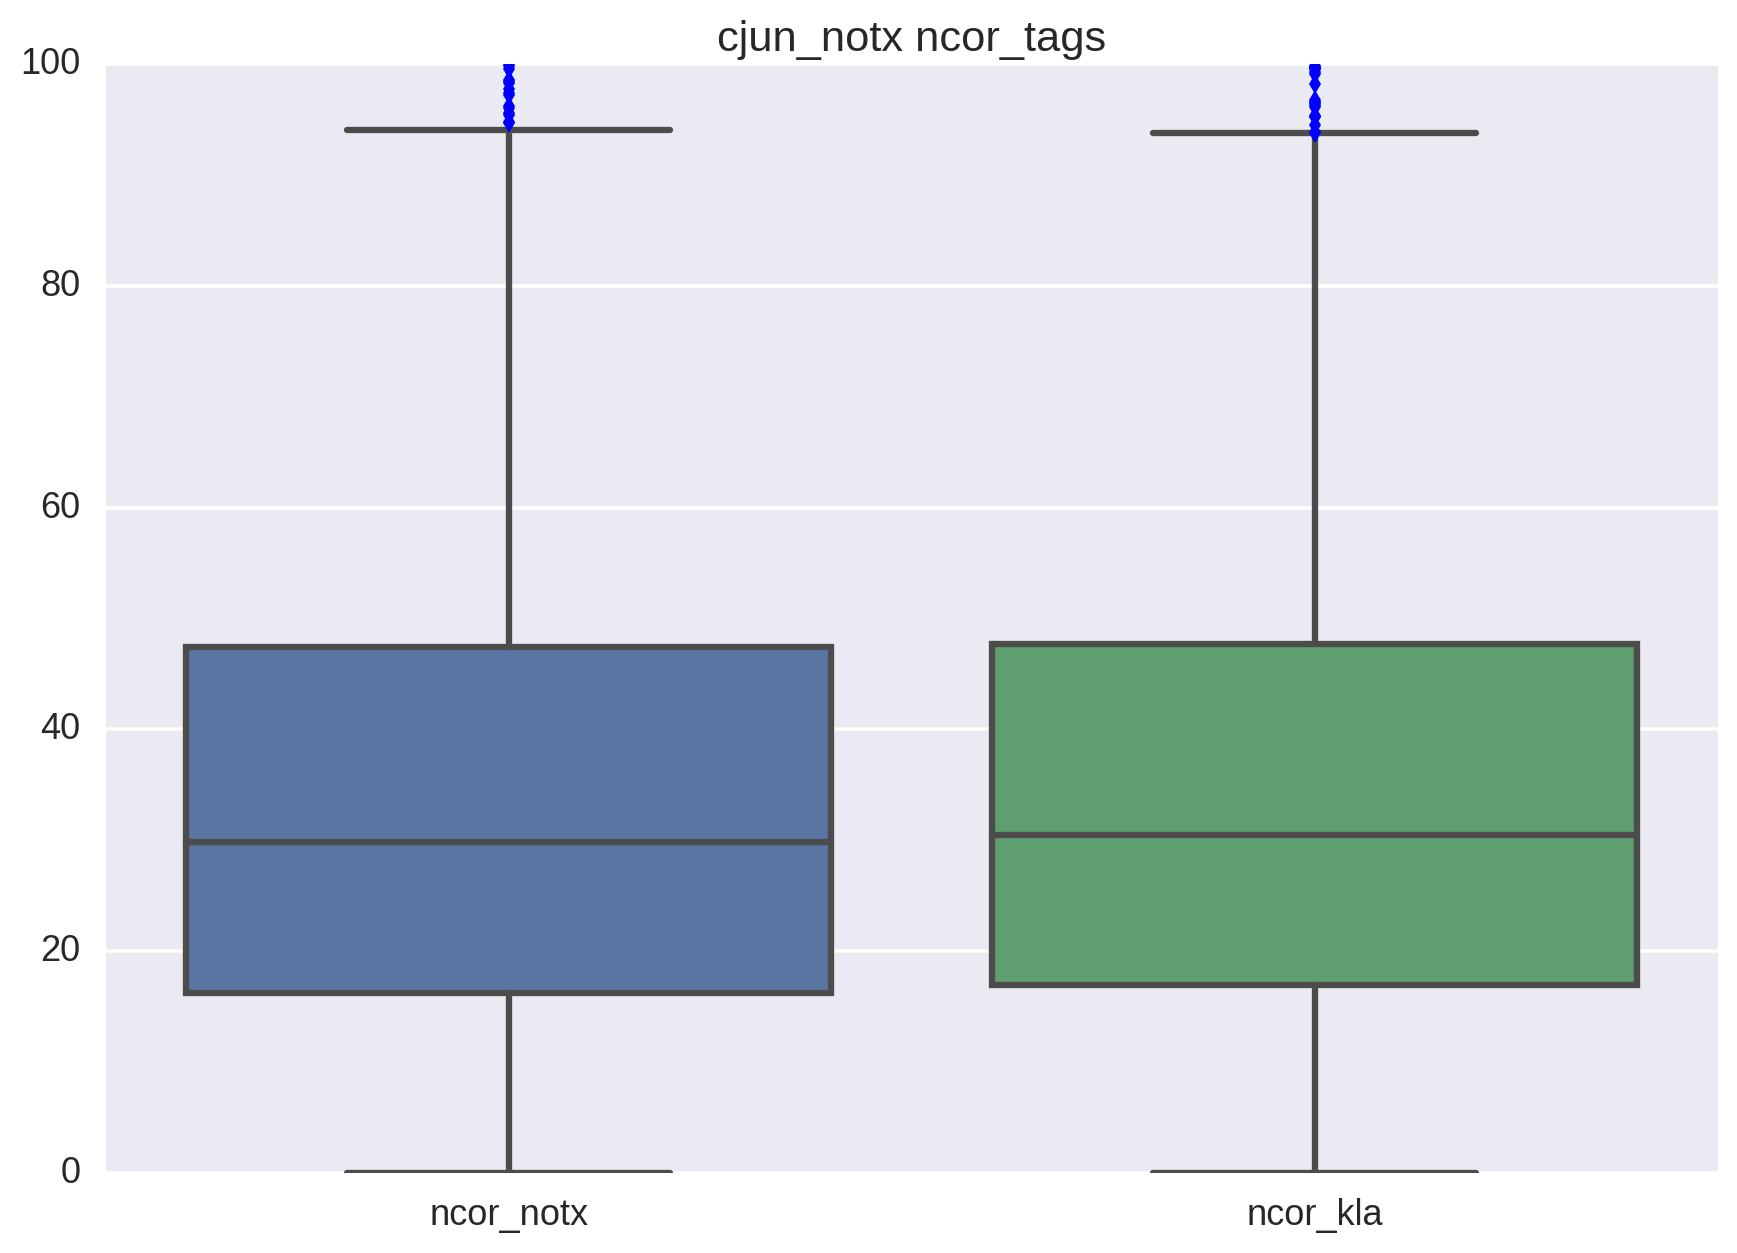

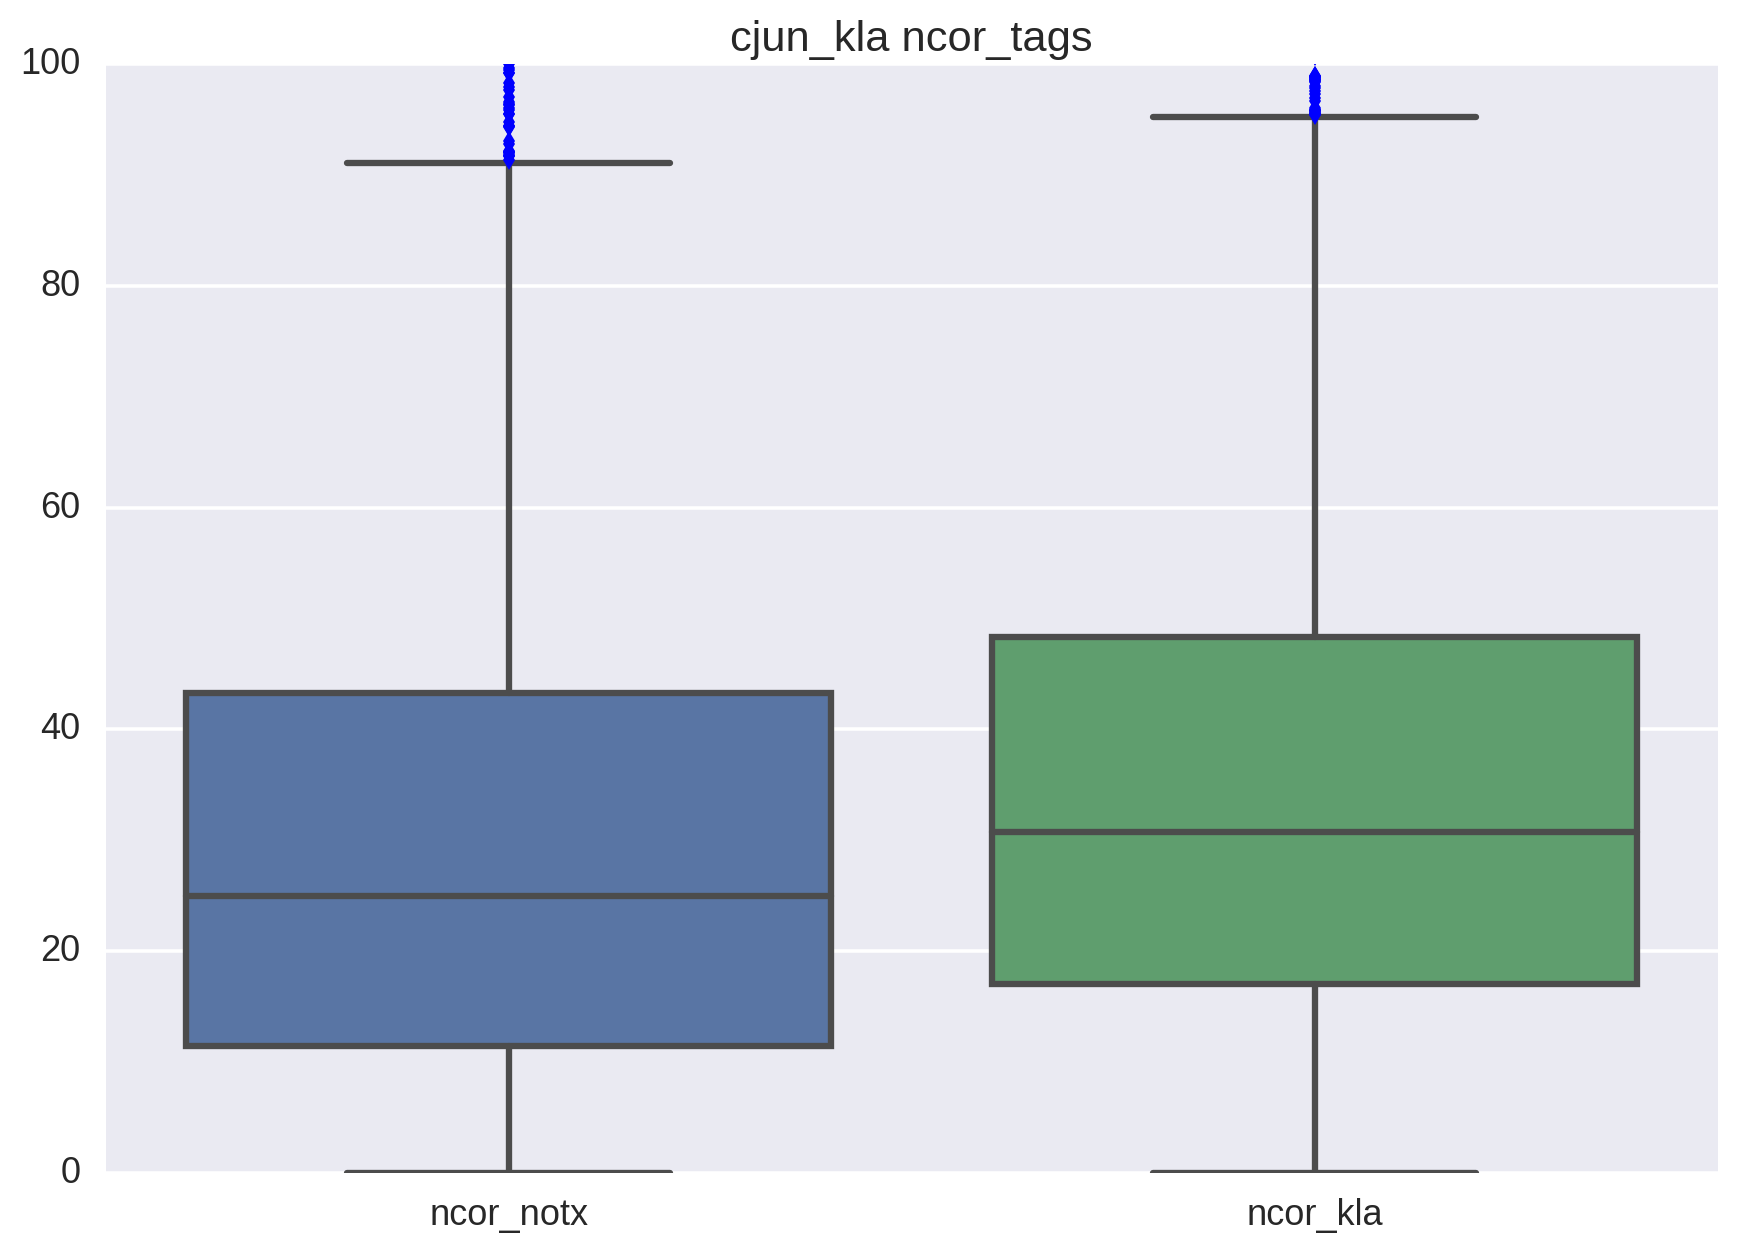

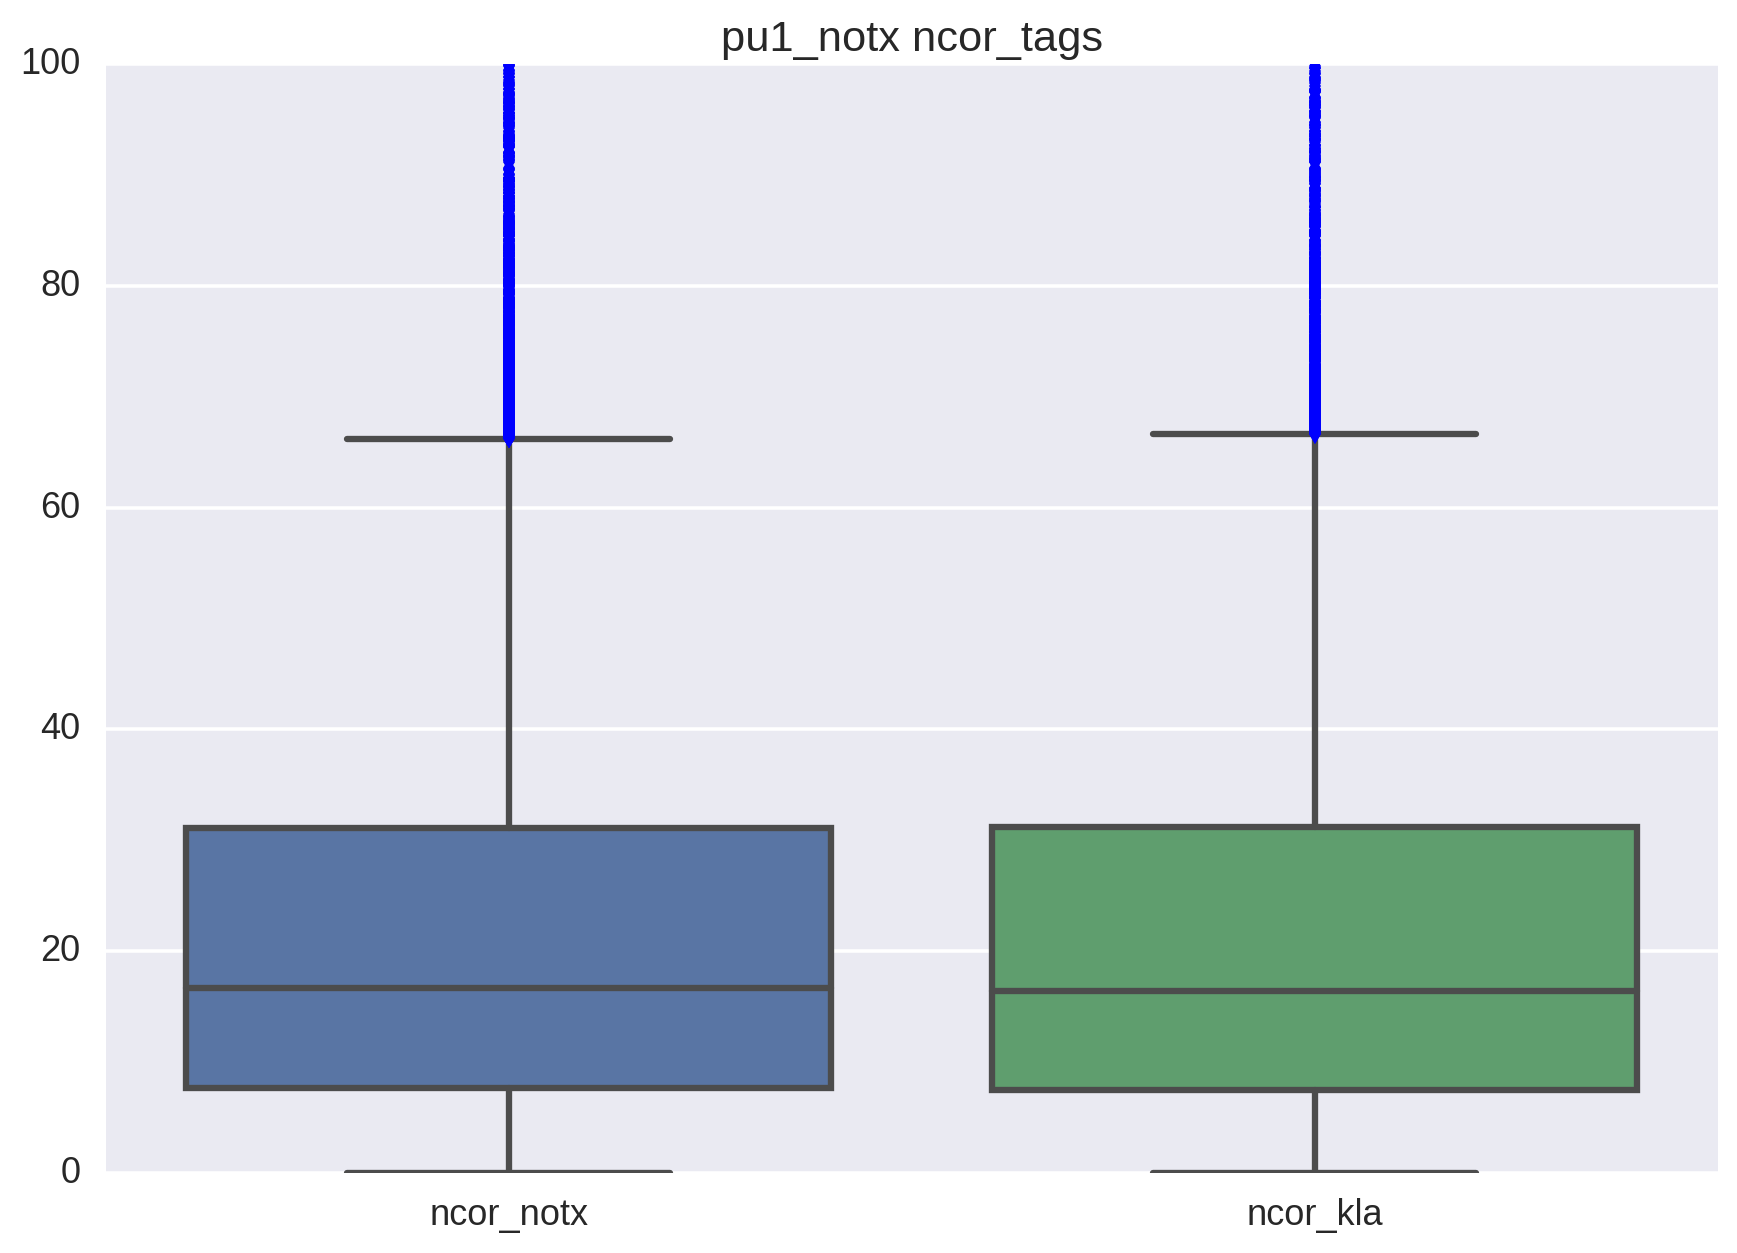

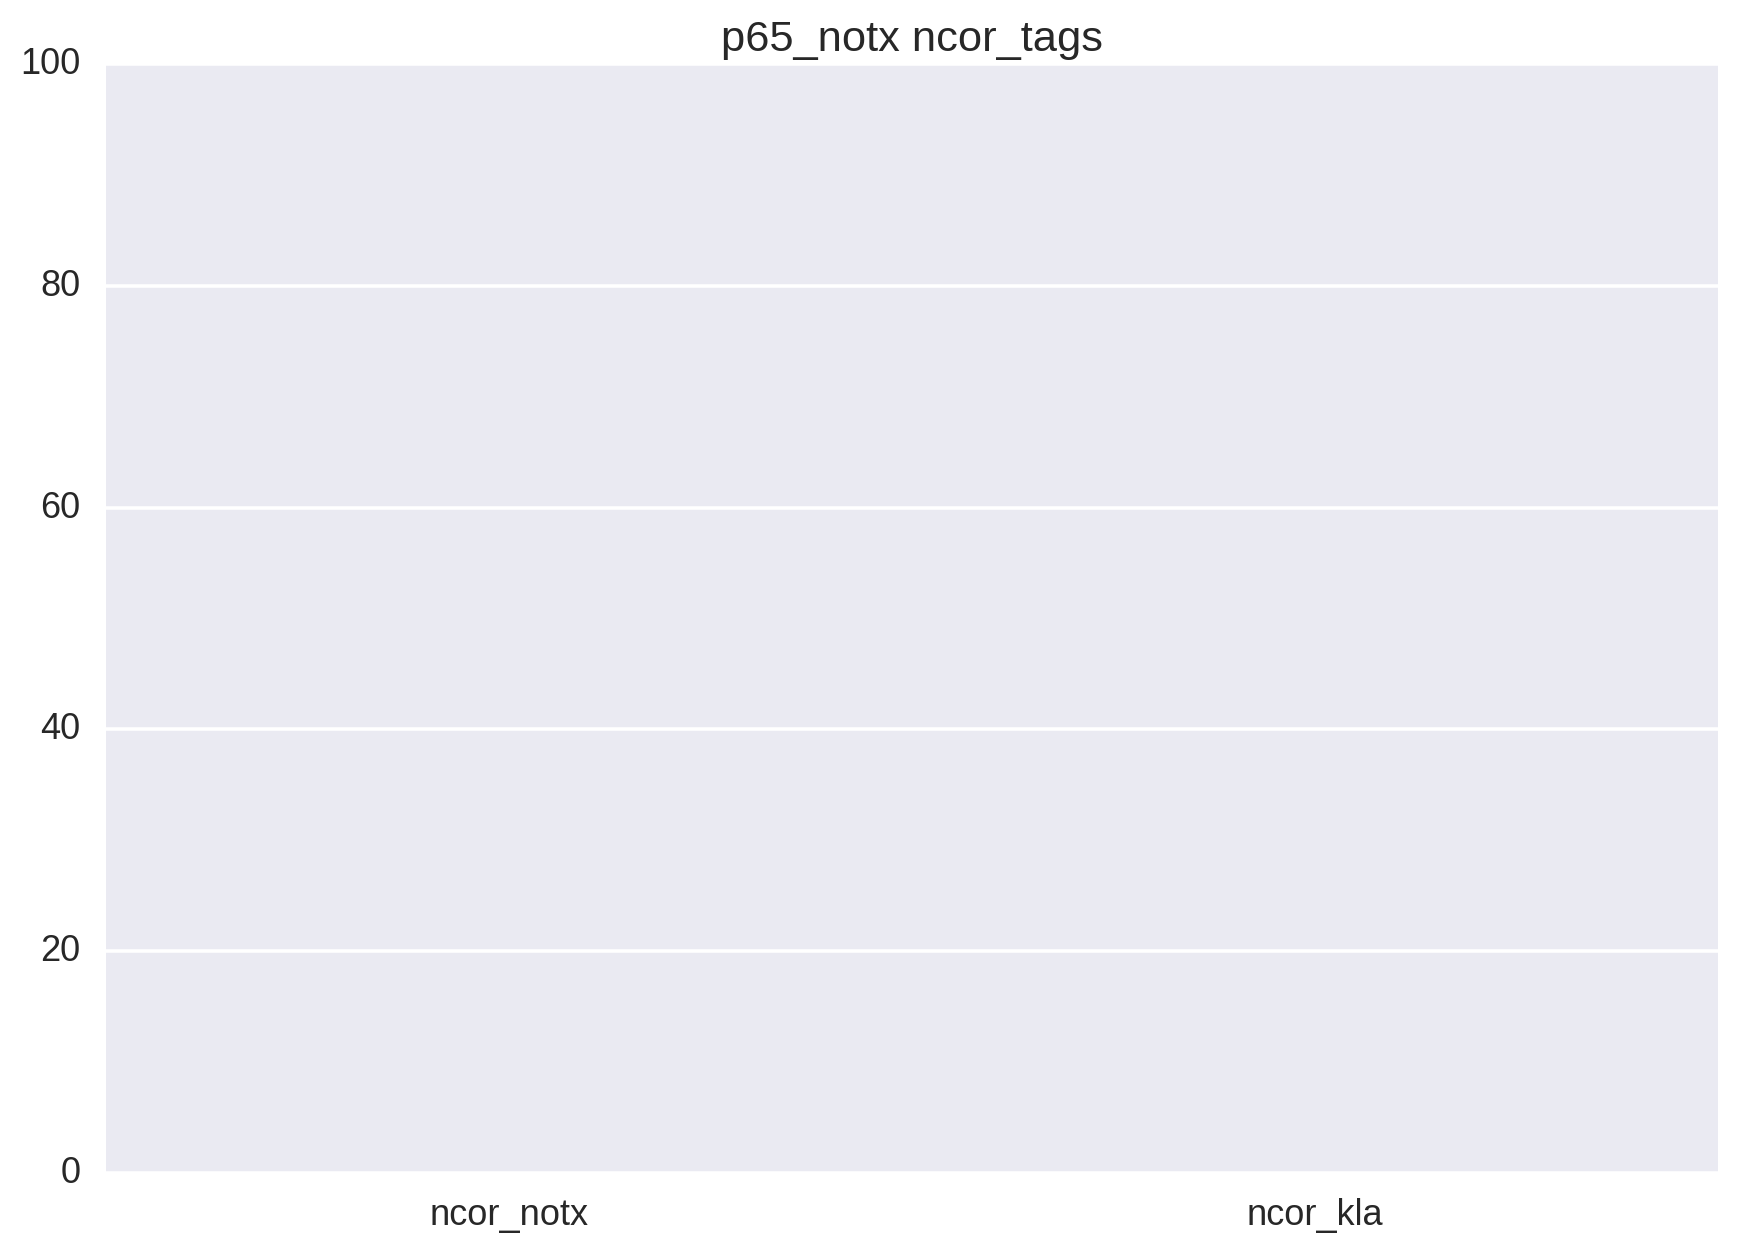

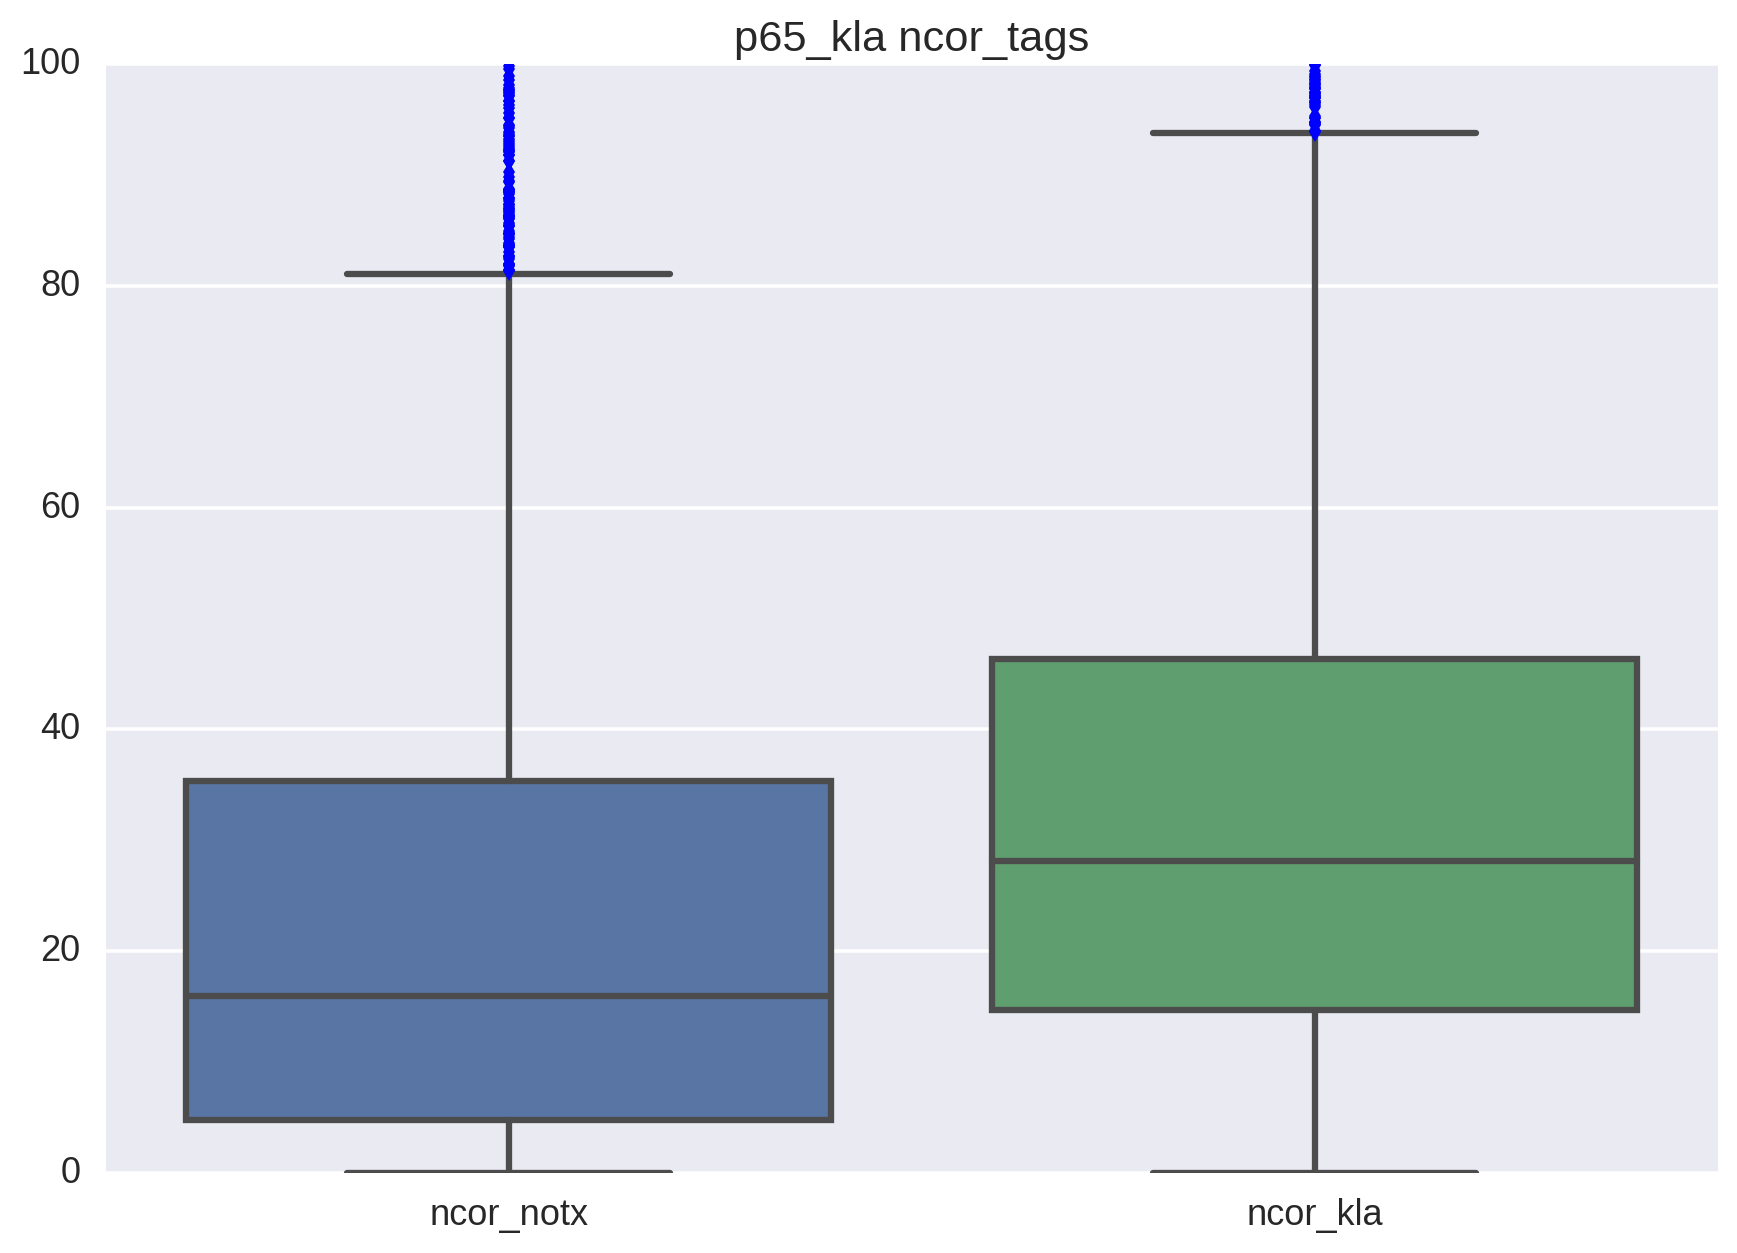

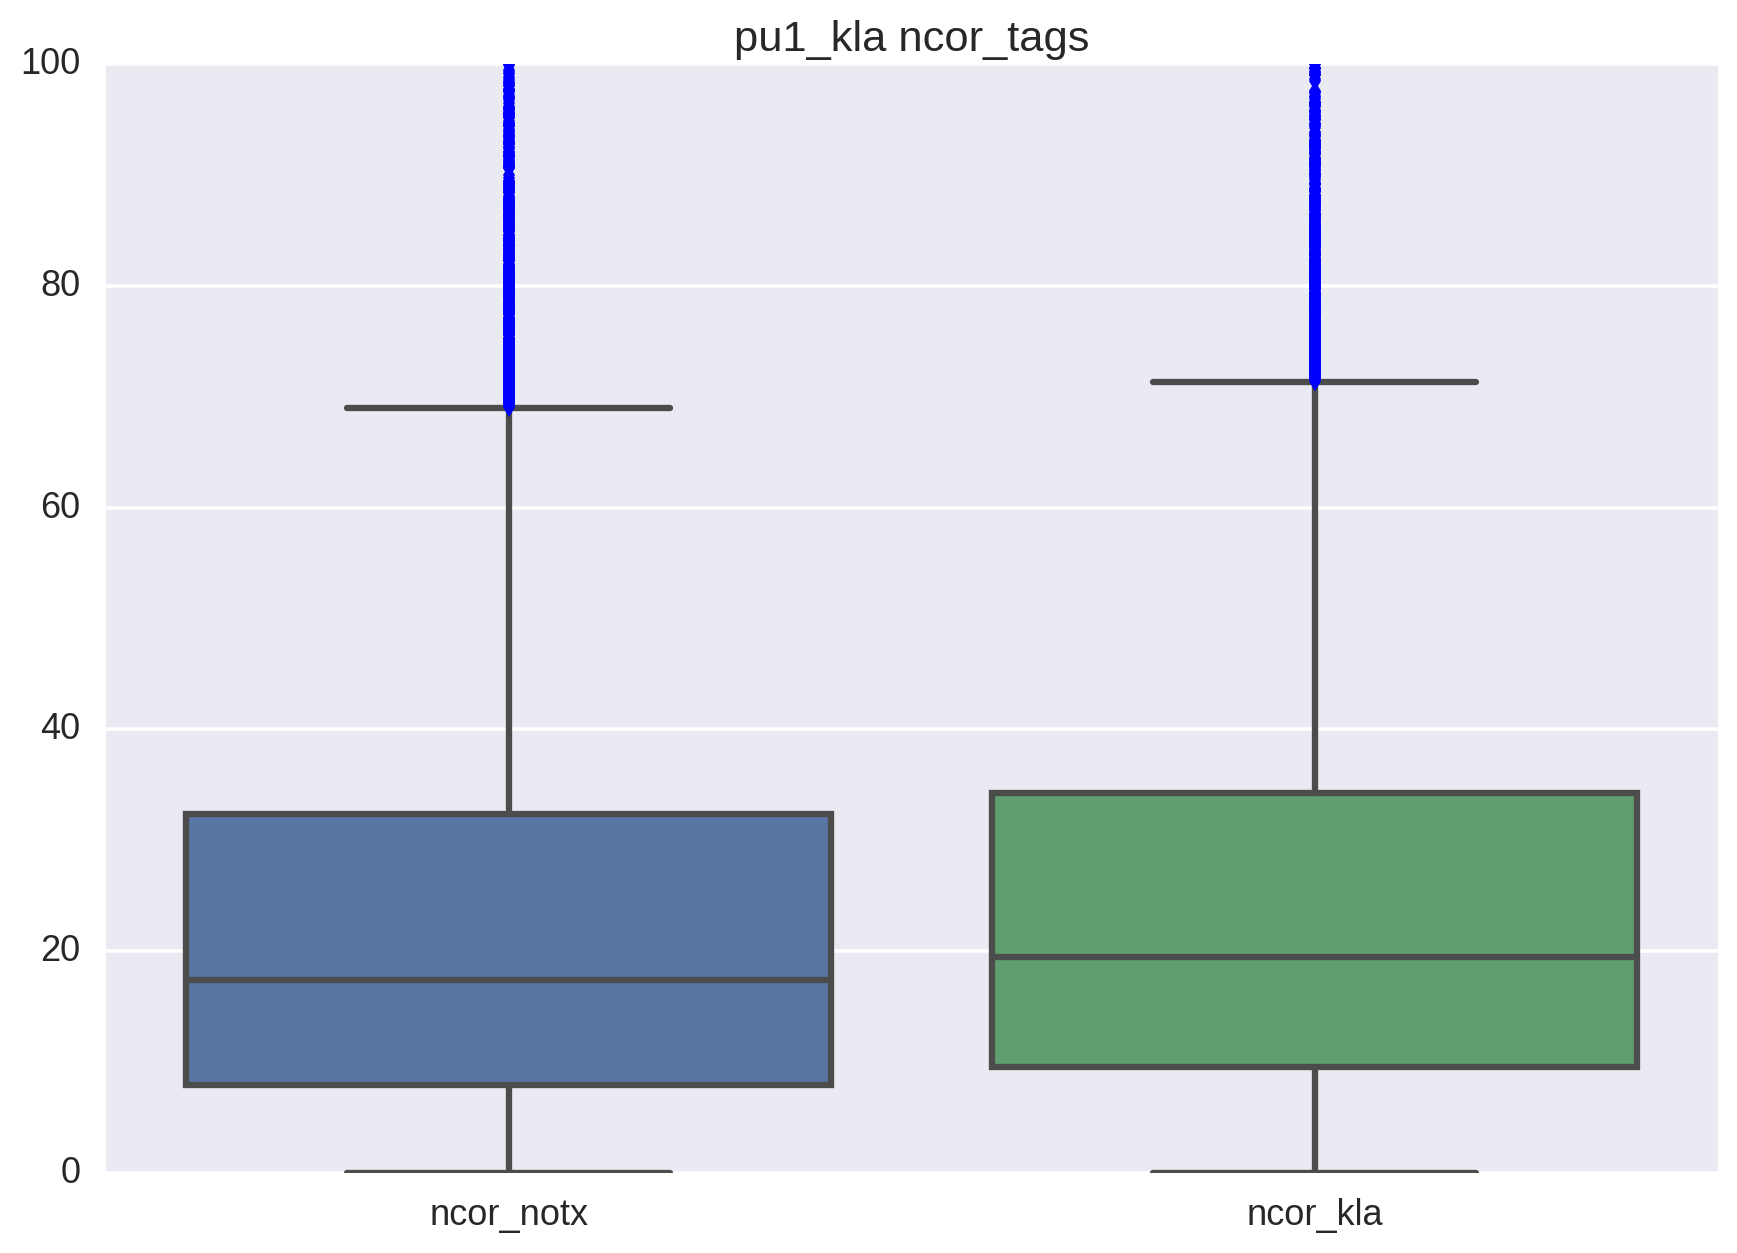

In [80]:
for p in os.listdir(outputDirectory):
    if 'ncorAnnotated' in p:
        data = pd.read_csv(outputDirectory + '/' + p, sep='\t')
        columns = data.columns.values
        columns[0] = '#PeakID'
        data.columns = columns
        data['ncor_notx'] = np.mean(data.ix[:, -2:], axis=1)
        data['ncor_kla'] = np.mean(data.ix[:, -4:-2], axis=1)   
        data = data[['#PeakID','Chr', 'Start', 'End', 'Strand', 'Peak Score', 'ncor_notx', 'ncor_kla']]
        sns.boxplot(data.ix[:,-2:])
        plt.title('_'.join(p.split('_')[:-1]) + ' ncor_tags')
        plt.savefig(outputDirectory + '/' + p.replace('ncorAnnotated.tsv', 'tagBoxplots.png'))
        plt.ylim([0,100])
        plt.show()
        
        # bin peaks
        if 'notx' in p:
            ncor_column = 'ncor_notx'
        else:
            ncor_column = 'ncor_kla'
        ncor_scores = data[ncor_column].values
        
        low_threshold = np.percentile(ncor_scores, 33)
        high_threshold = np.percentile(ncor_scores, 66)

        high_peaks = data[data[ncor_column] >high_threshold]
        high_peaks = high_peaks.to_csv(outputDirectory + '/' + p.replace('ncorAnnotated', 'high'), index = False, sep='\t')
        
        med_peaks = data[(data[ncor_column] >low_threshold) & (data[ncor_column] <= high_threshold)]
        med_peaks = med_peaks.to_csv(outputDirectory + '/' +p.replace('ncorAnnotated', 'med'), index = False, sep='\t')

        low_peaks = data[data[ncor_column] <= low_threshold]
        low_peaks = low_peaks.to_csv(outputDirectory + '/' + p.replace('ncorAnnotated', 'low'), index = False, sep='\t')



In [67]:
data.head()

,#PeakID,Chr,Start,End,Strand,Peak Score,Focus Ratio/Region Size,Annotation,Detailed Annotation,Distance to TSS,...,Gene Name,Gene Alias,Gene Description,Gene Type,"/home/jenhan/analysis/ncor_analysis/tag_directories_chip//Sample_Coro2AWT_BMDM_ChIP_NCoR_KLA_1h_JSS_15_02_02 Tag Count in 200 bp (10749675.0 Total, normalization factor = 0.93, effective total = 10000000)","/home/jenhan/analysis/ncor_analysis/tag_directories_chip//Sample_NCoRWT_BMDM_NCoR_KLA_1h_JSS_14_11_04 Tag Count in 200 bp (10444306.0 Total, normalization factor = 0.96, effective total = 10000000)","/home/jenhan/analysis/ncor_analysis/tag_directories_chip//Sample_Coro2AWT_BMDM_ChIP_NCoR_NoTx_JSS_15_02_02 Tag Count in 200 bp (11046480.0 Total, normalization factor = 0.91, effective total = 10000000)","/home/jenhan/analysis/ncor_analysis/tag_directories_chip//Sample_NCoRWT_BMDM_NCoR_NoTx_JSS_14_11_04 Tag Count in 200 bp (8111362.0 Total, normalization factor = 1.23, effective total = 10000000)",ncor_notx,ncor_kla
0,Merged-chr11-67589214-1,chr11,67589114,67589314,+,1000,/home/jenhan/analysis/ncor_analysis/peak_files...,"intron (NM_001109657, intron 1 of 13)","intron (NM_001109657, intron 1 of 13)",2714,...,Gas7,AW124766|B230343A10Rik|Gas7-cb,growth arrest specific 7,protein-coding,35.35,17.23,6.34,22.19,14.265,11.785
1,Merged-chr13-47105199-1,chr13,47105099,47105299,+,1000,/home/jenhan/analysis/ncor_analysis/peak_files...,"intron (NM_025900, intron 2 of 10)","intron (NM_025900, intron 2 of 10)",1022,...,Dek,1810019E15Rik|D13H6S231E,DEK oncogene (DNA binding),protein-coding,34.42,75.64,29.87,0.00,14.935,52.755
2,Merged-chr14-64312115-1,chr14,64312015,64312215,+,1000,/home/jenhan/analysis/ncor_analysis/peak_files...,"intron (NM_001253714, intron 1 of 4)",ORR1F|LTR|ERVL-MaLR,104841,...,Msra,2310045J23Rik|6530413P12Rik|MSR-A,methionine sulfoxide reductase A,protein-coding,38.14,35.43,14.48,34.52,24.500,24.955
3,Merged-chr6-129171888-1,chr6,129171788,129171988,+,1000,/home/jenhan/analysis/ncor_analysis/peak_files...,Intergenic,Intergenic,-8727,...,Clec2d,Clr-b|Clrb|Ocil,"C-type lectin domain family 2, member d",protein-coding,23.26,159.90,14.48,75.20,44.840,87.190
4,Merged-chr1-155075098-1,chr1,155074998,155075198,+,1000,/home/jenhan/analysis/ncor_analysis/peak_files...,Intergenic,Intergenic,24538,...,Ier5,-,immediate early response 5,protein-coding,32.56,115.85,13.58,7.40,10.490,64.715


In [85]:
# for every group of peaks
for p in os.listdir(outputDirectory):
    if not '_ncorAnnotated.tsv' in p and not 'png' in p and not 'histAnnotated' in p and '.tsv' in p:
        outpath = outputDirectory + '/' + p.replace('.tsv', '_histAnnotated.tsv')
        !annotatePeaks.pl $outputDirectory/$p mm10 -hist 20 -size 2000 -d /data/mm10/BMDM/ChIP/H3K4me1/BMDM-ChIP-H3K4me1-KLA-6h-NCoRKO-Josh-14-09-03 /data/mm10/BMDM/ChIP/H3K4me1/BMDM-ChIP-H3K4me1-KLA-6h-WT-Josh-14-09-03 /data/mm10/BMDM/ChIP/H3K4me1/BMDM-ChIP-H3K4me1-Veh-6h-NCoRKO-Josh-14-09-03 /data/mm10/BMDM/ChIP/H3K4me1/BMDM-ChIP-H3K4me1-Veh-6h-WT-Josh-14-09-03 /data/mm10/BMDM/ChIP/H3K4me1/NCoR-KO-BMDM-H3K4me1-1h-KLA-1h-Josh-14-04-22 /data/mm10/BMDM/ChIP/H3K4me1/NCor-KO-BMDM-H3K4me1-Veh-0h-Josh-14-04-22 /data/mm10/BMDM/ChIP/H3K4me1/WT-BMDM-H3K4me1-0h-Veh-0h-14-04-22 /data/mm10/BMDM/ChIP/H3K4me1/WT-BMDM-H3K4me1-1h-KLA-1h-14-04-22 /data/mm10/BMDM/ChIP/H3K4me2/BMDM-ChIP-H3K4me2-KLA-6h-NCoRKO-Josh-14-09-03 /data/mm10/BMDM/ChIP/H3K4me2/BMDM-ChIP-H3K4me2-KLA-6h-WT-Josh-14-09-03 /data/mm10/BMDM/ChIP/H3K4me2/BMDM-ChIP-H3K4me2-Veh-6h-NCoRKO-Josh-14-09-03 /data/mm10/BMDM/ChIP/H3K4me2/BMDM-ChIP-H3K4me2-Veh-6h-WT-Josh-14-09-03 /data/mm10/BMDM/ChIP/H3K4me2/NCoR-KO-BMDM-H3K4me2-0h-Veh-0h-Josh-14-04-22 /data/mm10/BMDM/ChIP/H3K4me2/NCoR-KO-BMDM-H3K4me2-1h-KLA-1h-Josh-14-04-22 /data/mm10/BMDM/ChIP/H3K4me2/WT-BMDM-H3K4me2-0h-Veh-0h-14-04-22 /data/mm10/BMDM/ChIP/H3K4me2/WT-BMDM-H3K4me2-1h-KLA-1h-14-04-22 /data/mm10/BMDM/ChIP/H3K4me3/NCoR-KO-BMDM-H3K4me3-KLA-1h-Josh-14-03-19 /data/mm10/BMDM/ChIP/H3K4me3/NCoR-KO-BMDM-H3K4me3-Veh-Josh-14-03-19 /data/mm10/BMDM/ChIP/H3K4me3/WT-BMDM-H3K4me3-KLA-1h-Josh-14-03-19 /data/mm10/BMDM/ChIP/H3K4me3/WT-BMDM-H3K4me3-Veh-Josh-14-03-19 /data/mm10/BMDM/ChIP/H3K4me3/NCoR-KO-BMDM-H3K4me3-KLA-1h-Josh-14-07-07 /data/mm10/BMDM/ChIP/H3K4me3/NCoR-KO-BMDM-H3K4me3-Veh-1h-Josh-14-07-07 /data/mm10/BMDM/ChIP/H3K4me3/WT-BMDM-H3K4me3-KLA-1h-Josh-14-07-07 /data/mm10/BMDM/ChIP/H3K4me3/WT-BMDM-H3K4me3-Veh-1h-Josh-14-07-07> $outpath 


	Peak file = /home/jenhan/analysis/ncor_analysis/methylation//pu1_kla_high.tsv
	Genome = mm10
	Organism = mouse
	-----------------------------------------------------
	Histogram mode activated (bin size = 20 bp)
	-----------------------------------------------------
	Peak Region set to 2000
	Tag Directories:
		/data/mm10/BMDM/ChIP/H3K4me1/BMDM-ChIP-H3K4me1-KLA-6h-NCoRKO-Josh-14-09-03
		/data/mm10/BMDM/ChIP/H3K4me1/BMDM-ChIP-H3K4me1-KLA-6h-WT-Josh-14-09-03
		/data/mm10/BMDM/ChIP/H3K4me1/BMDM-ChIP-H3K4me1-Veh-6h-NCoRKO-Josh-14-09-03
		/data/mm10/BMDM/ChIP/H3K4me1/BMDM-ChIP-H3K4me1-Veh-6h-WT-Josh-14-09-03
		/data/mm10/BMDM/ChIP/H3K4me1/NCoR-KO-BMDM-H3K4me1-1h-KLA-1h-Josh-14-04-22
		/data/mm10/BMDM/ChIP/H3K4me1/NCor-KO-BMDM-H3K4me1-Veh-0h-Josh-14-04-22
		/data/mm10/BMDM/ChIP/H3K4me1/WT-BMDM-H3K4me1-0h-Veh-0h-14-04-22
		/data/mm10/BMDM/ChIP/H3K4me1/WT-BMDM-H3K4me1-1h-KLA-1h-14-04-22
		/data/mm10/BMDM/ChIP/H3K4me2/BMDM-ChIP-H3K4me2-KLA-6h-NCoRKO-Josh-14-09-03
		/data/mm10/BMDM/ChIP/H3K4me2/

## Bin Peaks According to NCoR tag intensity

In [86]:
!cp $outputDirectory/*histAnnotated* ./

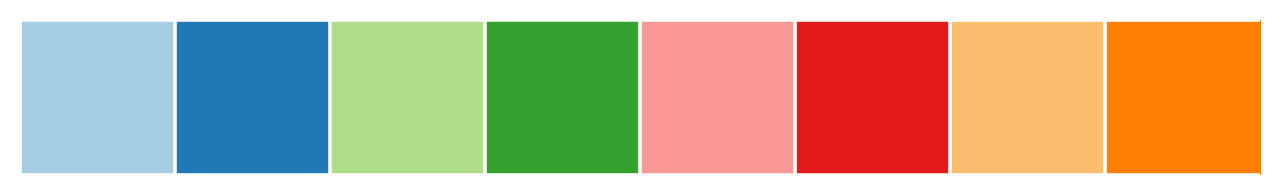

In [102]:
sns.palplot(sns.color_palette("Paired",8))

In [11]:
sns.set_palette(sns.color_palette("Paired",8))
for p in os.listdir(outputDirectory):
    if 'histAnnotated' in p:
        factor = p.replace('_histAnnotated.tsv', '')
        data=pd.read_csv(outputDirectory + '/' + p, sep='\t')
        columns = [x for x in data.columns.values if 'Coverage' in x]
        columns = [data.columns.values[0]] + columns
        data = data[columns]
        columns = data.columns.values
        columns[0] = 'Position'
        data.columns = columns

        data.columns = ['Position', 
                        'KO-H3K4me1-KLA-6h',
                        'WT-H3K4me1-KLA-6h',
                        'KO-H3K4me1-notx-6h',
                        'WT-H3K4me1-notx-6h',
                        'KO-H3K4me1-KLA-1h',
                        'KO-H3K4me1-notx-1h',
                        'WT-H3K4me1-notx-1h',
                        'WT-H3K4me1-KLA-1h',
                        
                        'KO-H3K4me2-KLA-6h',
                        'WT-H3K4me2-KLA-6h',
                        'KO-H3K4me2-notx-6h',
                        'WT-H3K4me2-notx-6h',
                        'KO-H3K4me2-notx-1h',
                        'KO-H3K4me2-KLA-1h',
                        'WT-H3K4me2-notx-1h',
                        'WT-H3K4me2-KLA-1h',
                        
                        'KO-H3K4me3-KLA-1h-1',
                        'KO-H3K4me3-notx-1h-1',
                        'WT-H3K4me3-KLA-1h-1',
                        'WT-H3K4me3-notx-1h-1',
                        'KO-H3K4me3-KLA-1h-2',
                        'KO-H3K4me3-notx-1h-2',
                        'WT-H3K4me3-KLA-1h-2',
                        'WT-H3K4me3-notx-1h-2',
                       ]
        # rearrange columns
        data = data[['Position', 
                        'KO-H3K4me1-KLA-6h',
                        'WT-H3K4me1-KLA-6h',
                        'KO-H3K4me1-notx-6h',
                        'WT-H3K4me1-notx-6h',
                        'KO-H3K4me1-KLA-1h',
                        'WT-H3K4me1-KLA-1h',
                        'KO-H3K4me1-notx-1h',
                        'WT-H3K4me1-notx-1h',
                        
                        'KO-H3K4me2-KLA-6h',
                        'WT-H3K4me2-KLA-6h',
                        'KO-H3K4me2-notx-6h',
                        'WT-H3K4me2-notx-6h',
                        'KO-H3K4me2-KLA-1h',
                        'WT-H3K4me2-KLA-1h',
                        'KO-H3K4me2-notx-1h',
                        'WT-H3K4me2-notx-1h',
                        
                        'KO-H3K4me3-KLA-1h-1',
                        'WT-H3K4me3-KLA-1h-1',
                        'KO-H3K4me3-notx-1h-1',
                        'WT-H3K4me3-notx-1h-1',
                        'KO-H3K4me3-KLA-1h-2',
                        'WT-H3K4me3-KLA-1h-2',
                        'KO-H3K4me3-notx-1h-2',
                        'WT-H3K4me3-notx-1h-2',
                       ]]
        for mark in ['H3K4me1', 'H3K4me2', 'H3K4me3']:
            coverageColumns = [x for x in data.columns if mark in x]
#             coverageColumns = [x for x in data.columns if mark in x and '1h' in x and not '-2' in x]
#             if 'KLA' in p:
#                 coverageColumns = [x for x in coverageColumns if 'KLA' in x]
#             else:
#                 coverageColumns = [x for x in coverageColumns if 'KLA' in x]
            print(p)
            for c in coverageColumns:
                print(c)
                if 'notx' in c:
                    linestyle='-'
                    marker='_'
                else:
                    linestyle = '-'
                    marker='*'
                plt.plot(data['Position'].values, data[c].values, linestyle=linestyle, marker=marker)
            plt.legend(coverageColumns)
            plt.title(factor + ' ' + mark + ' coverage')
#             plt.show()
            plt.savefig(outputDirectory+ '/' + p.replace('histAnnotated.tsv', mark) + '_tagDensity.png')
            plt.close()
        

p65_notx_med_histAnnotated.tsv
KO-H3K4me1-KLA-6h
WT-H3K4me1-KLA-6h
KO-H3K4me1-notx-6h
WT-H3K4me1-notx-6h
KO-H3K4me1-KLA-1h
WT-H3K4me1-KLA-1h
KO-H3K4me1-notx-1h
WT-H3K4me1-notx-1h
p65_notx_med_histAnnotated.tsv
KO-H3K4me2-KLA-6h
WT-H3K4me2-KLA-6h
KO-H3K4me2-notx-6h
WT-H3K4me2-notx-6h
KO-H3K4me2-KLA-1h
WT-H3K4me2-KLA-1h
KO-H3K4me2-notx-1h
WT-H3K4me2-notx-1h
p65_notx_med_histAnnotated.tsv
KO-H3K4me3-KLA-1h-1
WT-H3K4me3-KLA-1h-1
KO-H3K4me3-notx-1h-1
WT-H3K4me3-notx-1h-1
KO-H3K4me3-KLA-1h-2
WT-H3K4me3-KLA-1h-2
KO-H3K4me3-notx-1h-2
WT-H3K4me3-notx-1h-2
pu1_kla_med_histAnnotated.tsv
KO-H3K4me1-KLA-6h
WT-H3K4me1-KLA-6h
KO-H3K4me1-notx-6h
WT-H3K4me1-notx-6h
KO-H3K4me1-KLA-1h
WT-H3K4me1-KLA-1h
KO-H3K4me1-notx-1h
WT-H3K4me1-notx-1h
pu1_kla_med_histAnnotated.tsv
KO-H3K4me2-KLA-6h
WT-H3K4me2-KLA-6h
KO-H3K4me2-notx-6h
WT-H3K4me2-notx-6h
KO-H3K4me2-KLA-1h
WT-H3K4me2-KLA-1h
KO-H3K4me2-notx-1h
WT-H3K4me2-notx-1h
pu1_kla_med_histAnnotated.tsv
KO-H3K4me3-KLA-1h-1
WT-H3K4me3-KLA-1h-1
KO-H3K4me3-notx-1h-1


/bioinformatics/software/anaconda3/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
